# Aplicação do CRISP-DM - Previsão de preço de casas

## 1. Business Understanding
- O objetivo principal do projeto é prever o preço de venda de casas.
- O objetivo secundário é entender quais são os fatores que mais influenciam no preço de venda de casas.
- Esse tipo de modelo irá ajudar a entender o mercado imobiliário e a precificar casas baseado em caracteristicas preiviamente coletadas.
- Além de prever preços, poderemos evitar preços muito baixos ou muito altos, que podem ser prejudiciais para o mercado imobiliário e para a corretora.
## 2. Data Understanding

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Coleta
train_data = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
len(train_data.columns)

81

- os nossos dados possuem muitas features, por isso, será importante futuramente fazer uma seleção de features, para que o modelo não fique muito complexo. A análise dos dados ajudara tambem a encontrar as features mais importantes para o modelo.

In [9]:
# valores nulos
contagem_nulos = train_data.isnull().sum().sum()
print(f"Valores faltantes:",contagem_nulos)

Valores faltantes: 7829


Existem muitos valores nulos no nosso dataset. teremos que realizar algum tratamento, seja deletar ou substituir usando algum método, como a média, moda, entre outros.

In [10]:
import seaborn as sns

numerical_features = train_data.select_dtypes(include=['int64','float64'])
categorical_features = train_data.select_dtypes(include='object')

<Axes: >

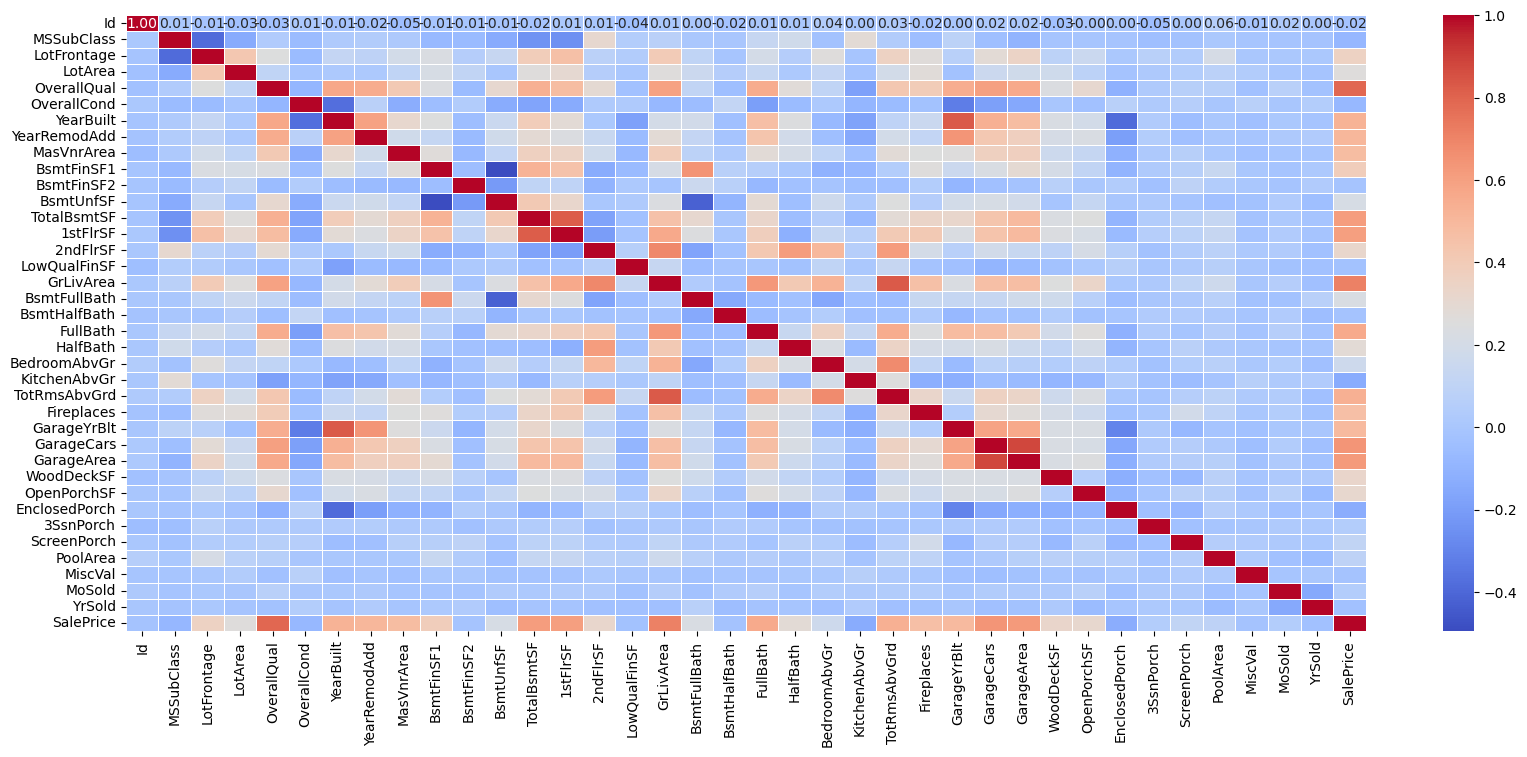

In [11]:
numerical_features_corr_matrix = numerical_features.corr()
plt.figure(figsize=(20,8))
sns.heatmap(numerical_features_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


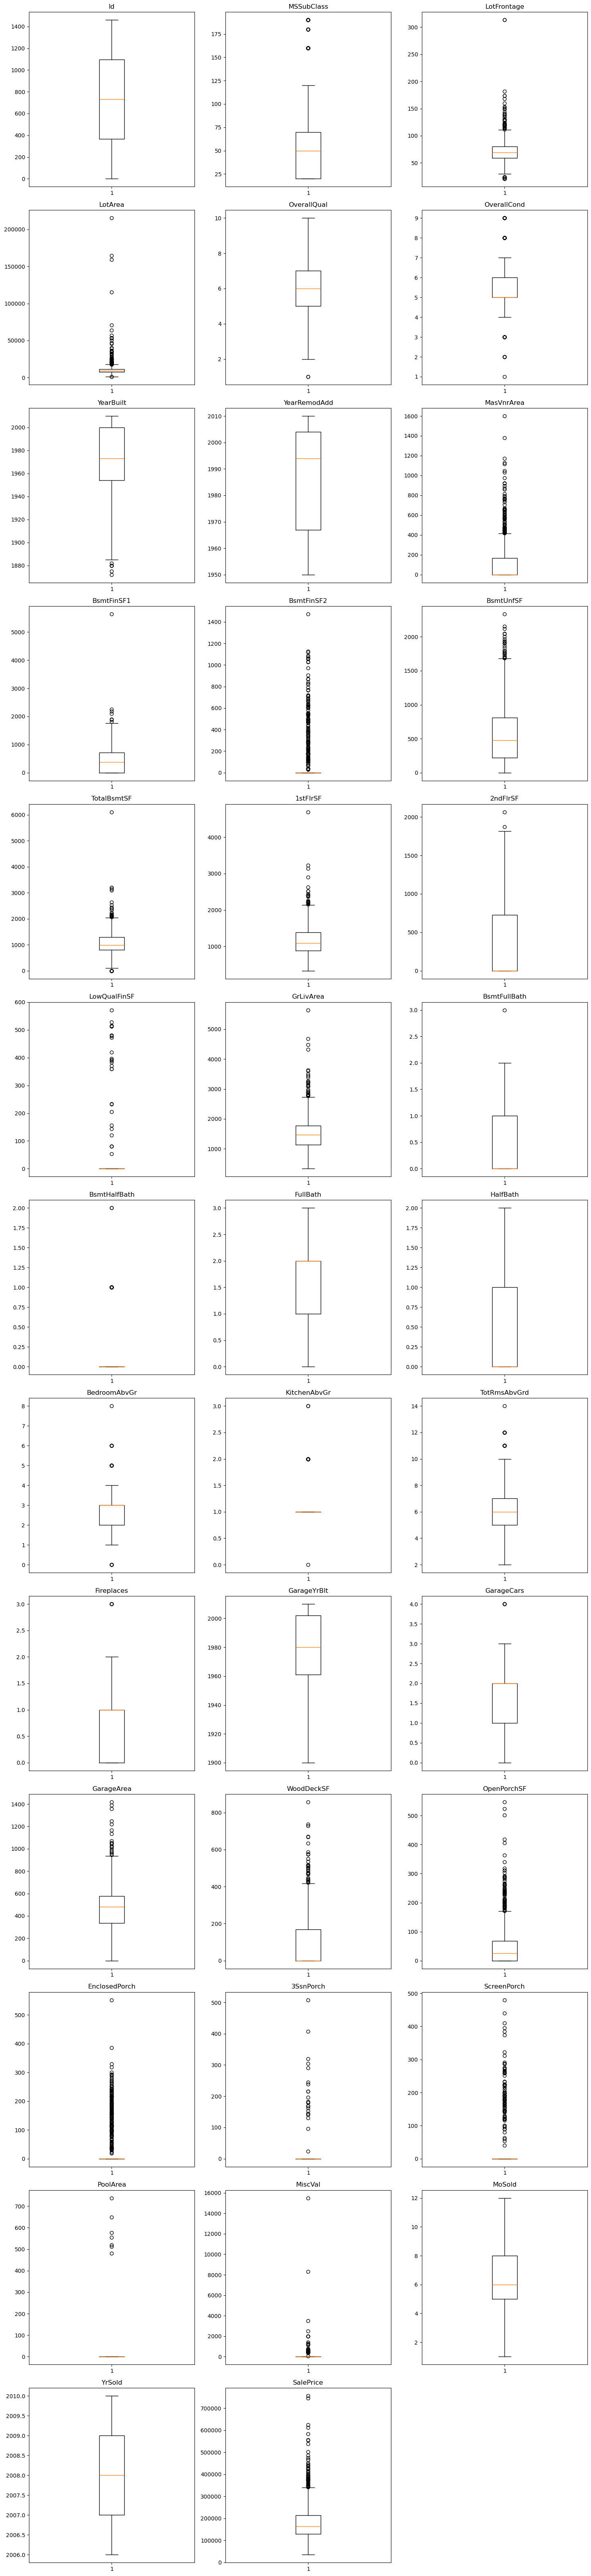

In [12]:
import numpy as np
# Calcula o número de linhas necessárias para os plots em um grid de 3 colunas
n_rows = int(np.ceil(len(numerical_features.columns) / 3))

fig, axs = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# "Achata" o array de eixos para facilitar a iteração
axs = axs.ravel()

# Plota os dados em cada subplot
for i, col in enumerate(numerical_features.columns):
    axs[i].boxplot(numerical_features[col].dropna())
    axs[i].set_title(col)

# Desativa os eixos extras, se houver
for j in range(i+1, n_rows*3):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
    

Presença de muitos outliers nas variáveis numéricas

In [13]:
categorical_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [14]:
categorical_features['MSZoning'].value_counts()

for col in categorical_features.columns:
    cardinality = len(categorical_features[col].value_counts())
    print(f"Cardinalidade da coluna {col}:",cardinality)

Cardinalidade da coluna MSZoning: 5
Cardinalidade da coluna Street: 2
Cardinalidade da coluna Alley: 2
Cardinalidade da coluna LotShape: 4
Cardinalidade da coluna LandContour: 4
Cardinalidade da coluna Utilities: 2
Cardinalidade da coluna LotConfig: 5
Cardinalidade da coluna LandSlope: 3
Cardinalidade da coluna Neighborhood: 25
Cardinalidade da coluna Condition1: 9
Cardinalidade da coluna Condition2: 8
Cardinalidade da coluna BldgType: 5
Cardinalidade da coluna HouseStyle: 8
Cardinalidade da coluna RoofStyle: 6
Cardinalidade da coluna RoofMatl: 8
Cardinalidade da coluna Exterior1st: 15
Cardinalidade da coluna Exterior2nd: 16
Cardinalidade da coluna MasVnrType: 3
Cardinalidade da coluna ExterQual: 4
Cardinalidade da coluna ExterCond: 5
Cardinalidade da coluna Foundation: 6
Cardinalidade da coluna BsmtQual: 4
Cardinalidade da coluna BsmtCond: 4
Cardinalidade da coluna BsmtExposure: 4
Cardinalidade da coluna BsmtFinType1: 6
Cardinalidade da coluna BsmtFinType2: 6
Cardinalidade da coluna H

Os dados categóricos nao possuem uma cardinalidade tão alta a ponto de deixar o modelo muito complexo. A coluna Neighbourhood é a qual possui a maior cardinalidade, com 25 valores possíveis. Pode-se criar variáveis Dummies para as colunas que forem utilizadas na modelagem

In [15]:
valores_faltantes_categorical = categorical_features.isnull().sum().sum()
valores_faltantes_numerical = numerical_features.isnull().sum().sum()

In [16]:
print(f"Valores Faltantes nas categóricas {valores_faltantes_categorical}\nValores faltantes nas numericas {valores_faltantes_numerical}\nTotal: {valores_faltantes_categorical+valores_faltantes_numerical}")

Valores Faltantes nas categóricas 7481
Valores faltantes nas numericas 348
Total: 7829


O tratamento de valores faltantes nas categóricas terá que ser bem pensado, pois está carregando a maioria de nulos de todo o dataset, enquanto as numéricas tem poucos

In [17]:
def count_null_values(features):
    null_counts = features.isnull().sum()
    for column, count in null_counts.items():
        if count > 0:
            print(f"Column '{column}' has {count} null values")
        else:
            continue

print("Numerical features null values p/ column")
count_null_values(numerical_features)
print("========================================")
print("\nCategorical features null values p/ column")
count_null_values(categorical_features)

Numerical features null values p/ column
Column 'LotFrontage' has 259 null values
Column 'MasVnrArea' has 8 null values
Column 'GarageYrBlt' has 81 null values

Categorical features null values p/ column
Column 'Alley' has 1369 null values
Column 'MasVnrType' has 872 null values
Column 'BsmtQual' has 37 null values
Column 'BsmtCond' has 37 null values
Column 'BsmtExposure' has 38 null values
Column 'BsmtFinType1' has 37 null values
Column 'BsmtFinType2' has 38 null values
Column 'Electrical' has 1 null values
Column 'FireplaceQu' has 690 null values
Column 'GarageType' has 81 null values
Column 'GarageFinish' has 81 null values
Column 'GarageQual' has 81 null values
Column 'GarageCond' has 81 null values
Column 'PoolQC' has 1453 null values
Column 'Fence' has 1179 null values
Column 'MiscFeature' has 1406 null values


Alley, FireplaceQu, PoolQC, MiscFeature (essas colunas tem muitos valores nulos e necessitam de uma atenção)

In [18]:
print("Alley:",categorical_features['Alley'].value_counts().sum())
print("FireplaceQu:",categorical_features['FireplaceQu'].value_counts().sum())
print("PoolQC:",categorical_features['PoolQC'].value_counts().sum())
print("MiscFeature:",categorical_features['MiscFeature'].value_counts().sum())
print("Linhas totais do dataframe:",train_data.shape[0])

Alley: 91
FireplaceQu: 770
PoolQC: 7
MiscFeature: 54
Linhas totais do dataframe: 1460


para as colunas alley, PoolQC e MiscFeature, vamos mante-las com valores, nulos. isso pode ajudar o nosso modelo a entender alguns padroes relacionados a registros que possuem os valores para estas colunas

In [19]:
cols_to_fillna = ["FireplaceQu",]